Questo crea dei grafici che mirano a visualizzare la bontà del metodo proposto
Inoltre visualizza anche qualche esempio di casi particolari o utili alla comprensione

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

main_path = "../../"

In [2]:
# model_name = "yo5_gram"
# model_name = "yo5_mio"
model_name = "yo8_mio"
input_folder = os.path.join(main_path, "results/speed/", model_name)

In [3]:
# Carica tutti i risultati
def import_results(folder_path):
    data_list = [f for f in os.listdir(folder_path) if f.lower().endswith('.csv')]
    all_estimation_data = []
    gt_data = []
    with_gt_data = []
    for file in data_list:
        with open(folder_path + file, mode ='r') as f:
            csvFile = csv.reader(f)
            next(csvFile)
            for lines in csvFile:
                video_name, min_f, max_f, vehicle_class, estimation_speed, laser_speed = lines
                all_estimation_data.append(round(float(estimation_speed)))
                if laser_speed:
                    gt_data.append(int(laser_speed))
                    with_gt_data.append(round(float(estimation_speed)))
    return all_estimation_data, gt_data, with_gt_data

def frequencies_list(input_list):
    values = list(range(50, 121))
    occurrences = [input_list.count(value) for value in values]
    return values, occurrences

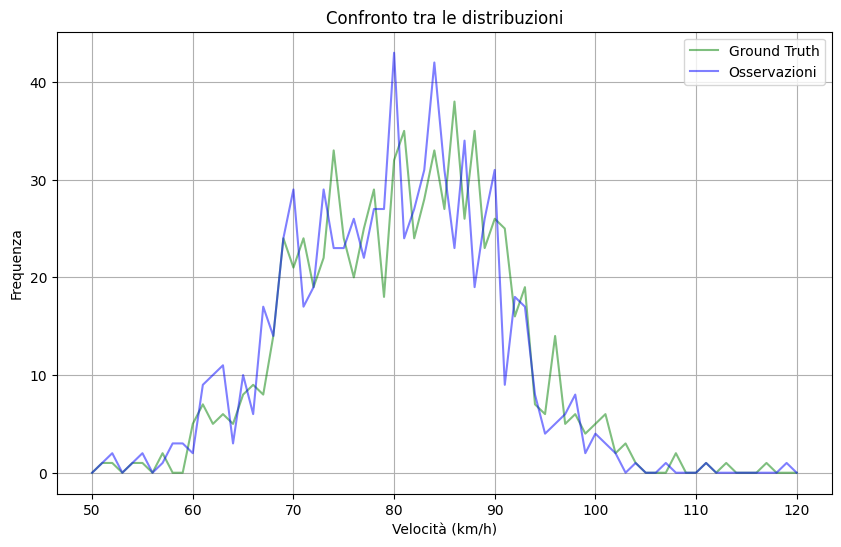

In [66]:
# Visualizza distribuzioni velocità
all_estimation_data, gt_data, with_gt_data = import_results(input_folder)

plt.figure(figsize=(10, 6))

# Plotta la prima distribuzione
x, y = frequencies_list(gt_data)
plt.plot(x, y, color='g', alpha=0.5, label="Ground Truth")
w, z = frequencies_list(with_gt_data)
plt.plot(w, z,  color='b', alpha=0.5, label="Osservazioni")

plt.xlabel('Velocità (km/h)')
plt.ylabel('Frequenza')
plt.title('Confronto tra le distribuzioni')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

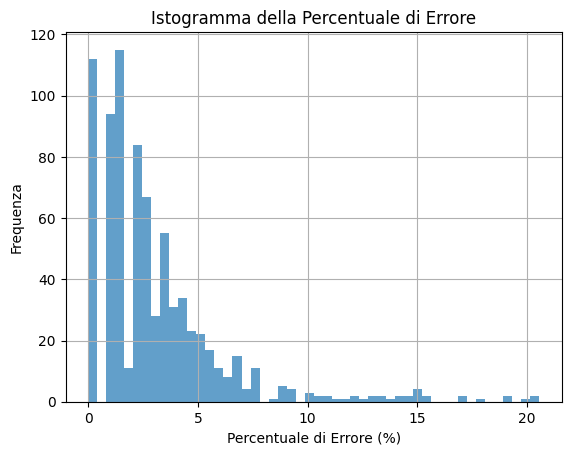

In [67]:
'''
data = [gt_data, with_gt_data]
plt.boxplot(data, labels=['Reali', 'Calcolati'])
plt.ylabel('Velocità')
plt.title('Boxplot di Valori Reali e Previsti')
plt.grid(True)
plt.show()
'''
error_percentage = np.abs((np.array(with_gt_data) - np.array(gt_data)) / np.array(gt_data)) * 100

# Creazione dell'istogramma della percentuale di errore con 30 bins
plt.hist(error_percentage, bins=50, alpha=0.7)

# Label e titolo
plt.xlabel('Percentuale di Errore (%)')
plt.ylabel('Frequenza')
plt.title('Istogramma della Percentuale di Errore')
plt.grid(True)
plt.show()

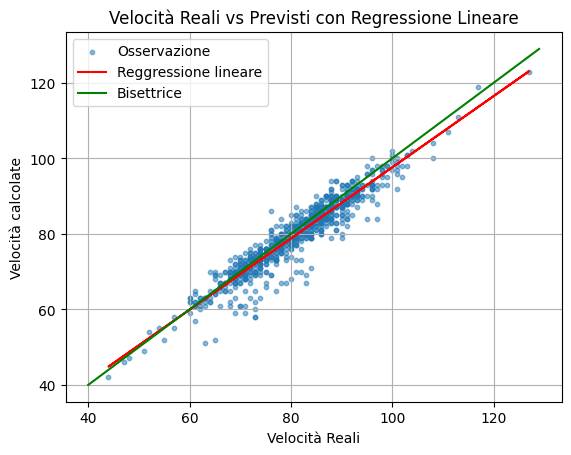

In [68]:
# Scatter plot delle coppie di valori
plt.scatter(gt_data, with_gt_data, s=10, alpha=0.5, label='Osservazione')

# Regressione lineare
m, b = np.polyfit(gt_data, with_gt_data, 1)
plt.plot(gt_data, m * np.array(gt_data) + b, color='r', label='Reggressione lineare')
plt.plot(range(40, 130), range(40, 130), color='g', label='Bisettrice')

# Label e titolo
plt.xlabel('Velocità Reali')
plt.ylabel('Velocità calcolate')
plt.title('Velocità Reali vs Previsti con Regressione Lineare')
plt.legend()
plt.grid(True)
plt.show()


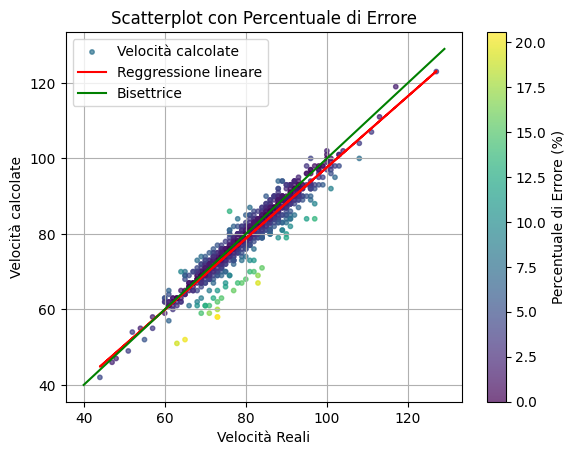

In [69]:
error_percentage = np.abs((np.array(with_gt_data) - np.array(gt_data)) / np.array(gt_data)) * 100

# Scatter plot con percentuale di errore
plt.scatter(gt_data, with_gt_data, c=error_percentage, cmap='viridis', s=10, alpha=0.7, label='Velocità calcolate')
plt.plot(gt_data, m * np.array(gt_data) + b, color='r', label='Reggressione lineare')
plt.plot(range(40, 130), range(40, 130), color='g', label='Bisettrice')

# Barra del colore per l'errore
plt.colorbar(label='Percentuale di Errore (%)')

# Label e titolo
plt.xlabel('Velocità Reali')
plt.ylabel('Velocità calcolate')
plt.title('Scatterplot con Percentuale di Errore')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
differences = [a - b for a, b in zip(gt_data, with_gt_data)]
mean_difference = sum(differences) / len(differences)

mse = sum((a - b) ** 2 for a, b in zip(gt_data, with_gt_data)) / len(gt_data)
mae = sum(abs(a - b) for a, b in zip(gt_data, with_gt_data)) / len(gt_data)

variance = sum((d - mean_difference) ** 2 for d in differences) / len(differences)

print("Numero di veicoli tracciati", len(gt_data))
print("Differenza media", mean_difference)
print("MSE", mse)
print("MAE", mae)
print("Varianza", variance)

Numero di veicoli tracciati 787
Differenza media 1.2770012706480305
MSE 12.372299872935196
MAE 2.4841168996188054
Varianza 10.741567627698505
